# Skin Detection
### Bianchi Luca (4805748)

## Intro
Context
Teoria

## Obiettivi
- Esplorare il mondo della skin detection
- Comprendere le criticità del task
- Definire alcuni possibili ambiti applicativi

## Metodo/i

## Analisi esperimenti
- Pollicione
- Jacobs
- manSweatingCloseup
- gioconda
- BC

## Conclusioni


In [25]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv


In [26]:
outputs = []
FILE_DIR = './material/images'

## Normalized RGB

In [27]:
def normalized(rgb):

        norm=np.zeros_like(rgb,np.float32)

        r = rgb[:, :, 0]
        g = rgb[:, :, 1]
        b = rgb[:, :, 2]
        sum = rgb.sum(axis=2)

        norm[:,:,0]=r/sum
        norm[:,:,1]=g/sum
        norm[:,:,2]=b/sum
        return norm

In [28]:
'''
with os.scandir(FILE_DIR+"/skin/") as direct:
    for file in direct:
        plt.figure(figsize=(32, 8))
        plt.suptitle(file.name)
        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
        skin_img_array = normalized(np.asarray(skin_img))
        plt.subplot(1, 9, 1)
        plt.imshow(skin_img_array)
        plt.subplot(1, 9, 2)
        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)
        plt.subplot(1, 9, 3)
        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)
        plt.subplot(1, 9, 4)
        plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)
        plt.subplot(1, 9, 5)
        plt.imshow(skin_img)
        plt.subplot(1, 9, (6, 7))
        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).max(axis=1))
        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).min(axis=1))
        plt.subplot(1, 9, (8, 9))
        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).max(axis=1))
        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).min(axis=1))
'''

'\nwith os.scandir(FILE_DIR+"/skin/") as direct:\n    for file in direct:\n        plt.figure(figsize=(32, 8))\n        plt.suptitle(file.name)\n        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)\n        skin_img_array = normalized(np.asarray(skin_img))\n        plt.subplot(1, 9, 1)\n        plt.imshow(skin_img_array)\n        plt.subplot(1, 9, 2)\n        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)\n        plt.subplot(1, 9, 3)\n        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)\n        plt.subplot(1, 9, 4)\n        plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)\n        plt.subplot(1, 9, 5)\n        plt.imshow(skin_img)\n        plt.subplot(1, 9, (6, 7))\n        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).max(axis=1))\n        plt.plot((skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).min(axis=1))\n        plt.subplot(1, 9, (8, 9))\n        plt.plot((skin_img_array[:, :, 

In [29]:
def norm_analysis(img):
    img_array = np.asarray(img)
    img_array_norm = normalized(img_array)
    fig = plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi immagine normalizzata")
    ax = plt.subplot(1, 4, 1)
    ax.title.set_text("Immagine normalizzata")
    plt.imshow(img_array_norm)
    plt.colorbar(orientation="vertical")
    mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
    mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1, 100)
    mask_norm = mask_rg & mask_rb
    ax = plt.subplot(1, 4, 2)
    ax.title.set_text("Maschera su R'/G'")
    plt.imshow(mask_rg, cmap='gray')
    ax = plt.subplot(1, 4, 3)
    ax.title.set_text("Maschera su R'/B'")
    plt.imshow(mask_rb, cmap='gray')
    ax = plt.subplot(1, 4, 4)
    ax.title.set_text("Maschera combinata")
    plt.imshow(mask_norm, cmap='gray')
    return mask_norm

## HSV

In [30]:
'''
with os.scandir(FILE_DIR+"/skin/") as direct:
    for file in direct:
        plt.figure(figsize=(32, 4))
        plt.suptitle(file.name)
        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
        skin_img_hsb = cv.cvtColor(skin_img, cv.COLOR_BGR2HSV)
        plt.subplot(1, 2, 1)
        plt.imshow(skin_img_hsb)
        plt.subplot(1, 2, 2)
        plt.imshow(skin_img)
        plt.figure(figsize=(32, 8))
        plt.subplot(1, 7, 1)
        plt.imshow(skin_img_hsb[:, :, 0], cmap="hsv")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 2)
        plt.imshow(skin_img_hsb[:, :, 1], cmap="Reds")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 3)
        plt.imshow(skin_img_hsb[:, :, 2], cmap="gray")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, (4, 5))
        plt.plot((skin_img_hsb[:, :, 0]).max(axis=1))
        plt.plot((skin_img_hsb[:, :, 0]).min(axis=1))
        plt.subplot(1, 7, (6, 7))
        plt.plot((skin_img_hsb[:, :, 1]).max(axis=1))
        plt.plot((skin_img_hsb[:, :, 1]).min(axis=1))
'''

'\nwith os.scandir(FILE_DIR+"/skin/") as direct:\n    for file in direct:\n        plt.figure(figsize=(32, 4))\n        plt.suptitle(file.name)\n        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)\n        skin_img_hsb = cv.cvtColor(skin_img, cv.COLOR_BGR2HSV)\n        plt.subplot(1, 2, 1)\n        plt.imshow(skin_img_hsb)\n        plt.subplot(1, 2, 2)\n        plt.imshow(skin_img)\n        plt.figure(figsize=(32, 8))\n        plt.subplot(1, 7, 1)\n        plt.imshow(skin_img_hsb[:, :, 0], cmap="hsv")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 2)\n        plt.imshow(skin_img_hsb[:, :, 1], cmap="Reds")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 3)\n        plt.imshow(skin_img_hsb[:, :, 2], cmap="gray")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, (4, 5))\n        plt.plot((skin_img_hsb[:, :, 0]).max(axis=1))\n        plt.plot((skin_img_hsb[:, :, 0]).min(axis=1))\n        plt.sub

In [31]:
def hsv_analysis(img):
    img_hsb = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    label = ["H", "S", "V"]
    cmaps = ["hsv", "Reds", "gray"]

    plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi spazio HSV")
    ax = plt.subplot(1, 5, 1)
    ax.title.set_text("Immagine HSV")
    plt.imshow(img_hsb, cmap='hsv')

    for elem in range(img_hsb.shape[2]):
        plt.subplot(1, 5, elem + 2)
        plt.imshow(img_hsb[:, :, elem], cmap=cmaps[elem])
        plt.colorbar(orientation='vertical')
        plt.title(label[elem])
    mask_hsv = cv.inRange(img_hsb[:,:,0], 95, 135) & cv.inRange(img_hsb[:, :, 1], 40, 200)
    ax = plt.subplot(1, 5, 5)
    ax.title.set_text("Maschera")
    plt.imshow(mask_hsv, cmap="gray")
    return mask_hsv

## YCrCb

In [32]:
'''
with os.scandir(FILE_DIR+"/skin/") as direct:
    for file in direct:
        plt.figure(figsize=(32, 4))
        plt.suptitle(file.name)
        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
        skin_img_ycbcr = cv.cvtColor(skin_img, cv.COLOR_RGB2YCrCb)
        plt.subplot(1, 2, 1)
        plt.imshow(skin_img_ycbcr)
        plt.subplot(1, 2, 2)
        plt.imshow(skin_img)
        plt.figure(figsize=(32, 8))
        plt.subplot(1, 7, 1)
        plt.imshow(skin_img_ycbcr[:, :, 0], cmap="gray")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 2)
        plt.imshow(skin_img_ycbcr[:, :, 1], cmap="Greens")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, 3)
        plt.imshow(skin_img_ycbcr[:, :, 2], cmap="Reds")
        plt.colorbar(orientation='horizontal')
        plt.subplot(1, 7, (4, 5))
        plt.plot((skin_img_ycbcr[:, :, 1]).max(axis=1))
        plt.plot((skin_img_ycbcr[:, :, 1]).min(axis=1))
        plt.subplot(1, 7, (6, 7))
        plt.plot((skin_img_ycbcr[:, :, 2]).max(axis=1))
        plt.plot((skin_img_ycbcr[:, :, 2]).min(axis=1))
'''

'\nwith os.scandir(FILE_DIR+"/skin/") as direct:\n    for file in direct:\n        plt.figure(figsize=(32, 4))\n        plt.suptitle(file.name)\n        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)\n        skin_img_ycbcr = cv.cvtColor(skin_img, cv.COLOR_RGB2YCrCb)\n        plt.subplot(1, 2, 1)\n        plt.imshow(skin_img_ycbcr)\n        plt.subplot(1, 2, 2)\n        plt.imshow(skin_img)\n        plt.figure(figsize=(32, 8))\n        plt.subplot(1, 7, 1)\n        plt.imshow(skin_img_ycbcr[:, :, 0], cmap="gray")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 2)\n        plt.imshow(skin_img_ycbcr[:, :, 1], cmap="Greens")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, 3)\n        plt.imshow(skin_img_ycbcr[:, :, 2], cmap="Reds")\n        plt.colorbar(orientation=\'horizontal\')\n        plt.subplot(1, 7, (4, 5))\n        plt.plot((skin_img_ycbcr[:, :, 1]).max(axis=1))\n        plt.plot((skin_img_ycbcr[:, :, 1]).min(axis=1

In [33]:
def ycbcr_analysis(img):
    img_ycbcr = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
    plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi spazio YCbCr")
    ax = plt.subplot(1, 5, 1)
    ax.title.set_text("Immagine in ycbcr")
    plt.imshow(img_ycbcr)
    ax = plt.subplot(1, 5, 2)
    ax.title.set_text("Luminanza")
    plt.imshow(img_ycbcr[:, : , 0], cmap='gray')
    plt.colorbar(orientation='vertical')
    ax = plt.subplot(1, 5, 3)
    ax.title.set_text("Crominanza blu")
    plt.imshow(img_ycbcr[:, :, 1], cmap='Greens')
    plt.colorbar(orientation='vertical')
    ax = plt.subplot(1, 5, 4)
    ax.title.set_text("Crominanza rosso")
    plt.imshow(img_ycbcr[:, :, 2], cmap='Reds')
    plt.colorbar(orientation='vertical')
    mask_ycrcb = cv.inRange(img_ycbcr[:, :, 1], 130, 185) & cv.inRange(img_ycbcr[:, :, 2], 80, 140)
    ax = plt.subplot(1, 5, 5)
    ax.title.set_text("Maschera")
    plt.imshow(mask_ycrcb, cmap="gray")
    return mask_ycrcb

Proviamo a filtrare sui canali Cr e Cb, dai quali possiamo estrarre ulteriore
informazione

Proviamo ora a combinare i tre filtri

In [34]:
def plot_masked(img, mask):
    plt.figure(figsize=(32, 8))
    plt.suptitle("Immagine mascherata")
    plt.imshow(cv.bitwise_or(img, img, mask=mask))

In [35]:
def run_analysis(img_name):
    img = np.asarray(plt.imread(FILE_DIR + img_name)).astype('uint8')
    plt.figure(figsize=(32, 8))
    plt.suptitle("Immagine originale")
    plt.imshow(img)

    mask = norm_analysis(img) & hsv_analysis(img) & ycbcr_analysis(img)
    plot_masked(img, mask)

## Analisi esperimenti

Cominciamo con l'analisi di un esperimento basilare, usando l'immagine di una mano su sfondo bianco

<ipython-input-27-7ade38f1b7b3>:10: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,0]=r/sum
<ipython-input-27-7ade38f1b7b3>:11: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,1]=g/sum
<ipython-input-27-7ade38f1b7b3>:12: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,2]=b/sum
<ipython-input-29-b4725551143e>:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-29-b4725551143e>:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1, 100)


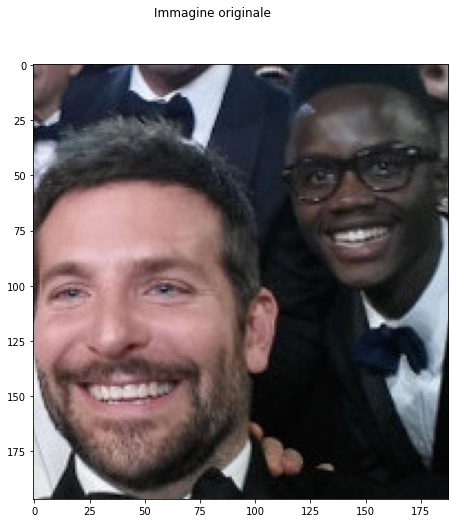

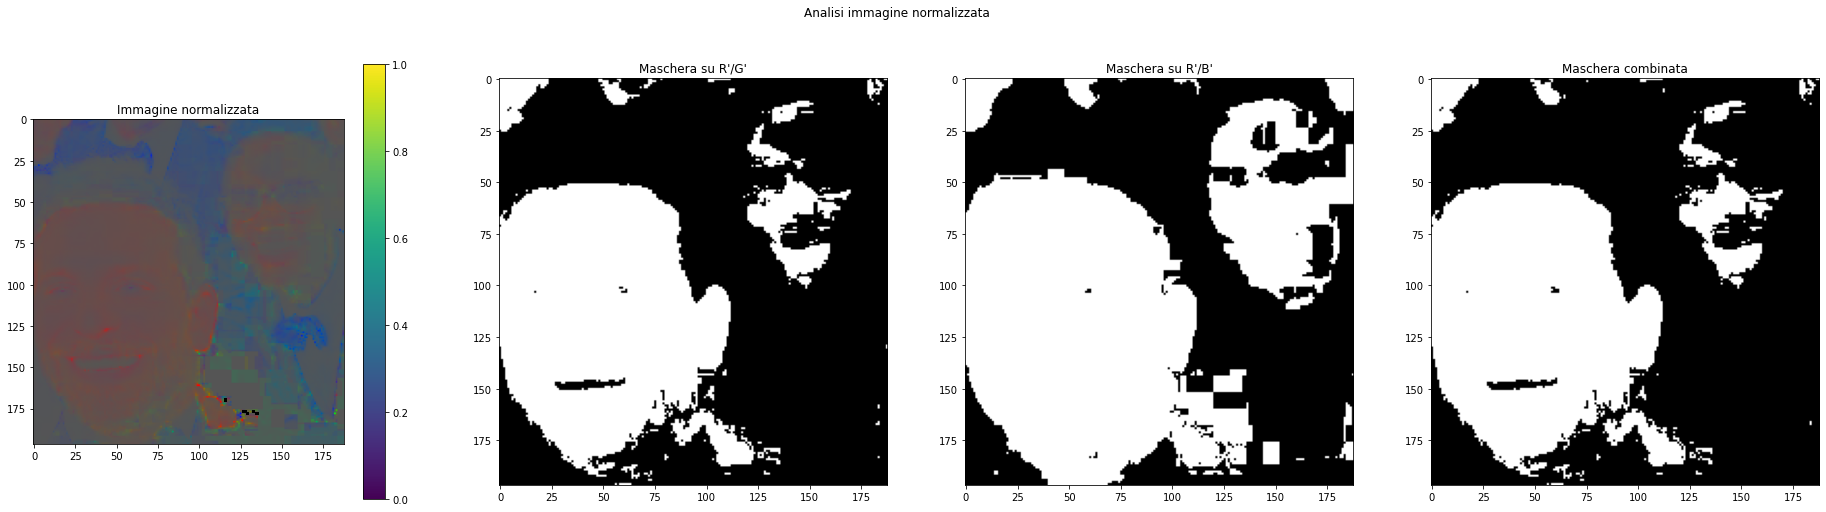

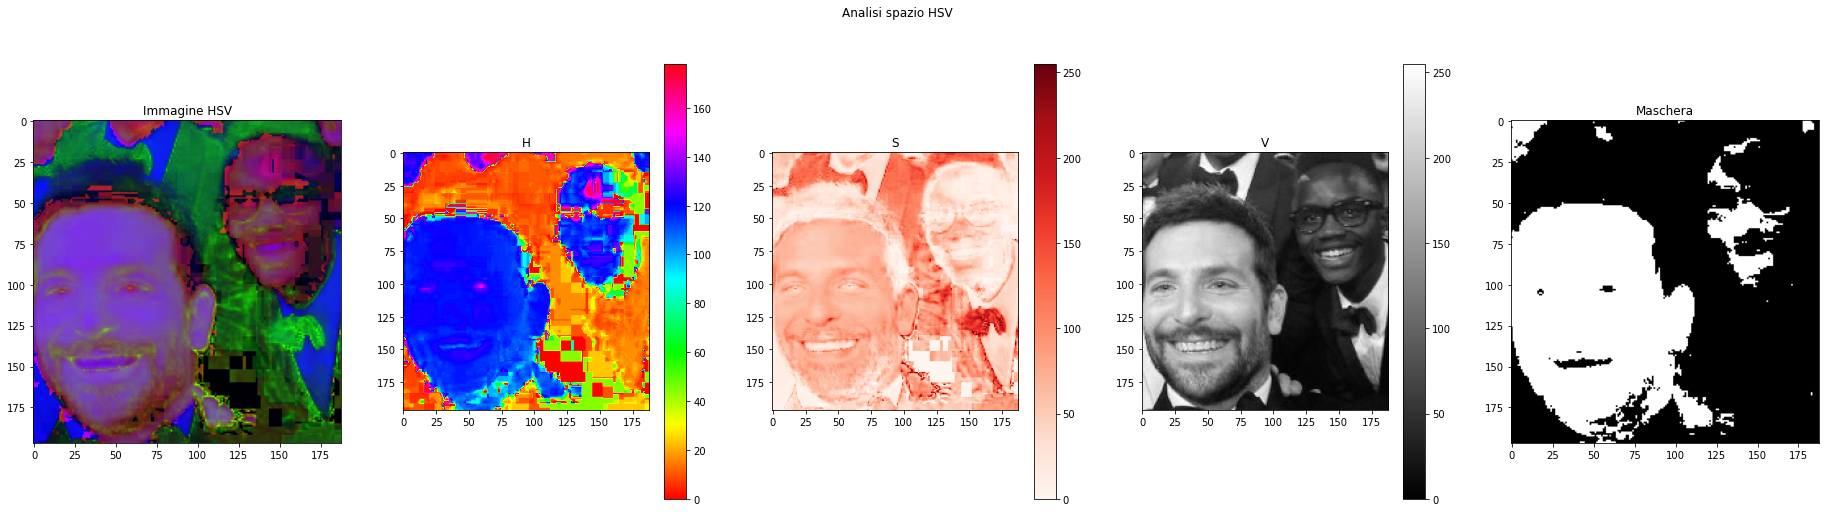

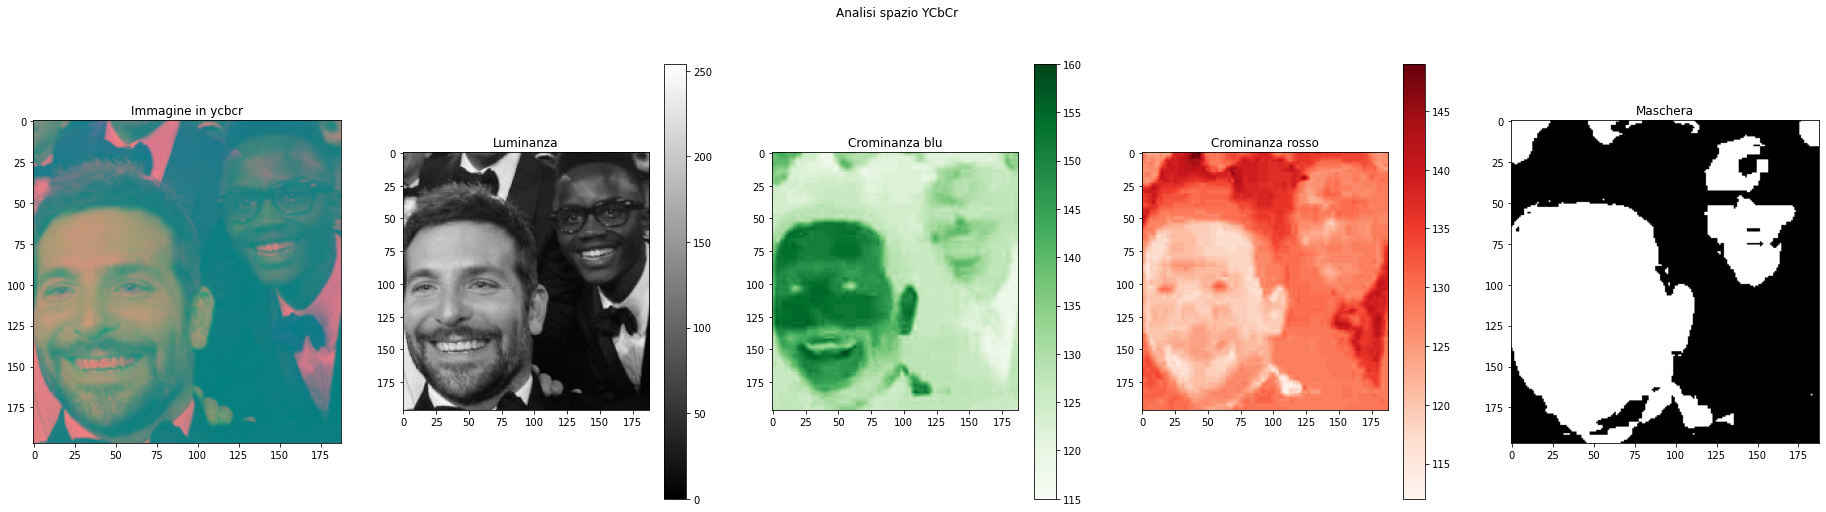

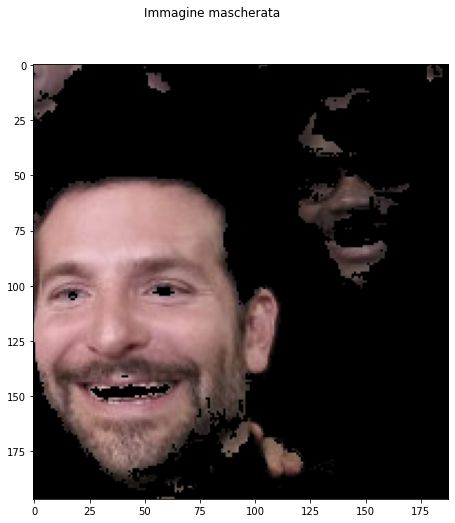

In [36]:
run_analysis("/BC.jpeg")